In [2562]:
import pysat
import numpy as np
import random
import matplotlib.pyplot as plt

In [2563]:
from pysat.solvers import Solver, Minisat22
from pysat.card import CardEnc

In [2564]:
solver = Solver(name='m22')

In [2565]:
dim = 10
grid = np.matrix(np.zeros((dim,dim)))

generated_coord = set()

num_points = 2*dim

while len(generated_coord) < num_points:
    x = random.randint(0, dim-1)
    y = random.randint(0, dim-1)
    generated_coord.add(tuple(sorted([x, y])))

points = list(generated_coord)

points_dict = zip(points, range(len(points)))
points_dict = dict(points_dict)

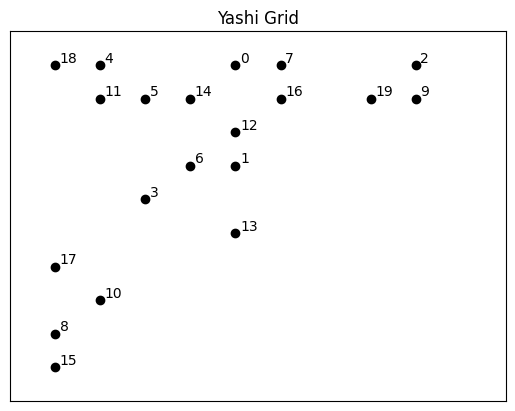

In [2566]:
x_coords = [point[0] for point in points_dict]
y_coords = [point[1] for point in points_dict]
labels = [label for label in points_dict.values()]

plt.scatter(x_coords, y_coords, color='black')
    
plt.title('Yashi Grid')
plt.xlim(-1, dim)
plt.ylim(-1, dim)

for i, txt in enumerate(labels):
    plt.annotate(txt, (x_coords[i], y_coords[i]), (x_coords[i] + 0.1, y_coords[i] + 0.1))


plt.xticks([])
plt.yticks([])

plt.show()

In [2567]:
def draw_edges(points):
    # Sort points based on their x-coordinates and y-coordinates separately
    sorted_by_x = sorted(points_dict, key=lambda p: (p[0], p[1]))
    sorted_by_y = sorted(points_dict, key=lambda p: (p[1], p[0]))

    edges = set()

    # Check for horizontal edges
    for i in range(len(sorted_by_y) - 1):
        if sorted_by_y[i][1] == sorted_by_y[i+1][1]:
            edges.add((sorted_by_y[i], sorted_by_y[i+1]))

    # Check for vertical edges
    for i in range(len(sorted_by_x) - 1):
        if sorted_by_x[i][0] == sorted_by_x[i+1][0]:
            edges.add((sorted_by_x[i], sorted_by_x[i+1]))

    return edges

22


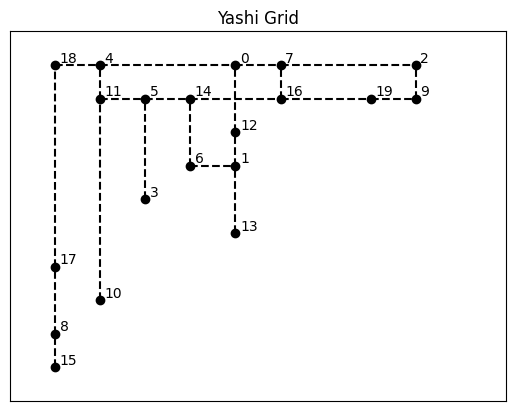

In [2568]:
x_coords = [point[0] for point in points_dict]
y_coords = [point[1] for point in points_dict]
labels = [label for label in points_dict.values()]

plt.scatter(x_coords, y_coords, color='black')

edges = draw_edges(points_dict.keys())
print(len(edges))
for edge in edges:
    x1, y1 = edge[0]
    x2, y2 = edge[1]
    plt.plot([x1, x2], [y1, y2], color='black', linestyle='dashed')
    
plt.title('Yashi Grid')
plt.xlim(-1, dim)
plt.ylim(-1, dim)

for i, txt in enumerate(labels):
    plt.annotate(txt, (x_coords[i], y_coords[i]), (x_coords[i] + 0.1, y_coords[i] + 0.1))


plt.xticks([])
plt.yticks([])

plt.show()

In [2569]:
lines = list(edges)

In [2570]:
lines_dict = {}
lines_idx = {}
lines_inv = {}
cont = 1
for line in lines:
    sorted_edge = tuple(sorted(line[0])), tuple(sorted(line[1]))
    sorted_edge = tuple(sorted(sorted_edge, key=lambda x: x[0]))
    lines_dict[line] = 'X_' + str(points_dict[sorted_edge[0]]) +  str(points_dict[sorted_edge[1]])
    lines_idx[line] = cont
    lines_inv[cont] = line
    cont += 1

lines_inv

{1: ((3, 6), (3, 8)),
 2: ((7, 8), (8, 8)),
 3: ((4, 9), (5, 9)),
 4: ((1, 9), (4, 9)),
 5: ((1, 8), (2, 8)),
 6: ((5, 9), (8, 9)),
 7: ((3, 6), (4, 6)),
 8: ((0, 1), (0, 3)),
 9: ((3, 8), (5, 8)),
 10: ((4, 7), (4, 9)),
 11: ((2, 5), (2, 8)),
 12: ((4, 4), (4, 6)),
 13: ((2, 8), (3, 8)),
 14: ((8, 8), (8, 9)),
 15: ((5, 8), (5, 9)),
 16: ((1, 8), (1, 9)),
 17: ((0, 3), (0, 9)),
 18: ((0, 0), (0, 1)),
 19: ((4, 6), (4, 7)),
 20: ((0, 9), (1, 9)),
 21: ((5, 8), (7, 8)),
 22: ((1, 2), (1, 8))}

In [2571]:
def lines_to_undirected_graph(lines):
    graph = {}

    for line in lines:
        start, end = line

        if end in graph:
            graph[end].append(start)
        else:
            graph[end] = [start]

        if start in graph:
            graph[start].append(end)
        else:
            graph[start] = [end]

    return graph

In [2572]:
def find_all_cycles(graph):
    def dfs(current, start, path, path_nodes):
        nonlocal cycles, sort_cyc
        visited[current] = True
        path.append(current)
        for neighbor in graph[current]:
            if not visited[neighbor]:
                dfs(neighbor, start, path, path_nodes)
            elif neighbor == start and len(path) > 2:
                new_cycle = path[:]
                sorted_cycle = sorted(path[:])
                if sorted_cycle not in sort_cyc:
                    cycles.append(new_cycle)
                    sort_cyc.append(sorted_cycle)

        path.pop()
        if path_nodes != []:
            path_nodes.pop()
        visited[current] = False

    nodes = graph.keys()

    visited = {}
    for node in nodes:
        visited[node] = False
    cycles, sort_cyc = [], []

    for node in nodes:
        dfs(node, node, [], [])

    return cycles

# Example usage with adjacency list 'graph'
cycles = find_all_cycles(lines_to_undirected_graph(lines))
cyc_lines = []
for cycle in cycles:
    ll = []
    print(cycle)
    for i in range(len(cycle)-1):
        cyc = lines_idx[tuple(sorted((cycle[i], cycle[i+1]), key=lambda p: (p[0], p[1])))]
        ll.append(cyc)
    cyc_lines.append(ll)

print(cycles)


[(3, 8), (3, 6), (4, 6), (4, 7), (4, 9), (5, 9), (8, 9), (8, 8), (7, 8), (5, 8)]
[(3, 8), (3, 6), (4, 6), (4, 7), (4, 9), (5, 9), (5, 8)]
[(3, 8), (3, 6), (4, 6), (4, 7), (4, 9), (1, 9), (1, 8), (2, 8)]
[(3, 8), (5, 8), (5, 9), (4, 9), (1, 9), (1, 8), (2, 8)]
[(3, 8), (5, 8), (7, 8), (8, 8), (8, 9), (5, 9), (4, 9), (1, 9), (1, 8), (2, 8)]
[(8, 8), (7, 8), (5, 8), (5, 9), (8, 9)]
[[(3, 8), (3, 6), (4, 6), (4, 7), (4, 9), (5, 9), (8, 9), (8, 8), (7, 8), (5, 8)], [(3, 8), (3, 6), (4, 6), (4, 7), (4, 9), (5, 9), (5, 8)], [(3, 8), (3, 6), (4, 6), (4, 7), (4, 9), (1, 9), (1, 8), (2, 8)], [(3, 8), (5, 8), (5, 9), (4, 9), (1, 9), (1, 8), (2, 8)], [(3, 8), (5, 8), (7, 8), (8, 8), (8, 9), (5, 9), (4, 9), (1, 9), (1, 8), (2, 8)], [(8, 8), (7, 8), (5, 8), (5, 9), (8, 9)]]


In [2573]:
def check_intersections(lines):
    def check_intersection(line1, line2):
        (x1, y1), (x2, y2) = line1
        (x3, y3), (x4, y4) = line2

        return (min(x1, x2) < x3 < max(x1, x2) and min(y3, y4) < y1 < max(y3, y4)) or (min(y1, y2) < y3 < max(y1, y2) and min(x3, x4) < x1 < max(x3, x4))

    intersection_segments = []
    for i in lines:
        for j in lines:
            if i != j:
                if check_intersection(i, j):
                    new_int = sorted((lines_idx[i], lines_idx[j]))
                    if new_int not in intersection_segments:
                        intersection_segments.append(new_int)
    
    return intersection_segments  

In [2574]:
intersections = check_intersections(lines)

In [2575]:
lines_per_point = {}
for point in points_dict:
    lines_per_point[point] = []
    for line in lines_idx:
        if point in list(line):
            lines_per_point[point].append(lines_idx[line])

lines_per_point

{(4, 9): [3, 4, 10],
 (4, 6): [7, 12, 19],
 (8, 9): [6, 14],
 (2, 5): [11],
 (1, 9): [4, 16, 20],
 (2, 8): [5, 11, 13],
 (3, 6): [1, 7],
 (5, 9): [3, 6, 15],
 (0, 1): [8, 18],
 (8, 8): [2, 14],
 (1, 2): [22],
 (1, 8): [5, 16, 22],
 (4, 7): [10, 19],
 (4, 4): [12],
 (3, 8): [1, 9, 13],
 (0, 0): [18],
 (5, 8): [9, 15, 21],
 (0, 3): [8, 17],
 (0, 9): [17, 20],
 (7, 8): [2, 21]}

In [2576]:
from pysat.examples.rc2 import RC2
from pysat.formula import WCNF

wcnf = WCNF()

for cycle in cyc_path:
    const = [i * -1 for i in cycle]
    wcnf.append(const)

for intersect in intersections:
    const = [i * -1 for i in intersect]
    wcnf.append(const)

for i in range(1, len(lines) + 1):
    const = [-j if j != i else j for j in range(1, len(lines) + 1)]
    wcnf.append(lines_per_point[point])

with RC2(wcnf) as rc2:
    model = rc2.compute()  # solving the MaxSAT problem
    #print(rc2.cost)

In [2577]:
def plot_model():
    
    x_coords = [point[0] for point in points_dict]
    y_coords = [point[1] for point in points_dict]
    labels = [label for label in points_dict.values()]

    plt.scatter(x_coords, y_coords, color='black')

    for edge in true_vars:
        x1, y1 = lines_inv[int(str(edge))][0]
        x2, y2 = lines_inv[int(str(edge))][1]
        plt.plot([x1, x2], [y1, y2], color='black', linestyle='dashed')
        
    plt.title('Yashi Grid')
    plt.xlim(-1, dim)
    plt.ylim(-1, dim)

    for i, txt in enumerate(labels):
        plt.annotate(txt, (x_coords[i], y_coords[i]), (x_coords[i] + 0.1, y_coords[i] + 0.1))

    # Add labels on the lines
    for edge in true_vars:
        x_mid = (lines_inv[int(str(edge))][0][0] + lines_inv[int(str(edge))][1][0]) / 2
        y_mid = (lines_inv[int(str(edge))][0][1] + lines_inv[int(str(edge))][1][1]) / 2
        plt.text(x_mid, y_mid, int(str(edge)), fontsize=10, color='red', ha='center', va='center')

    plt.xticks([])
    plt.yticks([])

    plt.show()

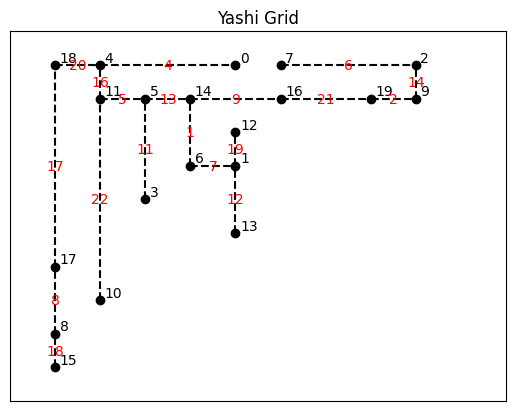

In [2578]:
from z3 import *

s = Solver()

vars = [str(i) for i in range(1, len(lines) + 1)]
bool_vars = [Bool(v) for v in vars]

for cycle in cyc_lines:
    const = [Not(bool_vars[i-1]) for i in cycle]
    const = Or(tuple(const))
    s.add(const)

for intersect in intersections:
    const = [Not(bool_vars[i-1]) for i in intersect]
    const = Or(tuple(const))
    s.add(const)

# At least 'n' variables must be true
s.add(AtLeast(*bool_vars, 2*dim - 1))

# At most 'n' variables must be true
s.add(AtMost(*bool_vars, 2*dim - 1))

# Check satisfiability
result = s.check()

if result == sat:
    # Get the model and extract the values of the variables
    model = s.model()
    true_vars = [v for v in bool_vars if is_true(model.eval(v))]
    plot_model()
else:
    print('Not Satisfiable')